# Data Science Project on Time Series

##### Data Science Project on Time Series with python using a Dataset- Fremont Bridge Bicycle Counts.

As an example of working with some time series data, let’s take a look at bicycle counts on Seattle’s Fremont Bridge. This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. The hourly bicycle counts can be downloaded from here.

Once this dataset is downloaded, we can use Pandas to read the CSV output into a DataFrame. We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

# Import Important libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import cv2
import plotly.express as px

%matplotlib inline


# Data Collection

In [59]:
data = pd.read_csv("./data/fremont_bridge.csv", index_col='Date', parse_dates=True)
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


For convenience, we’ll further process this dataset by shortening the column names and adding a “Total” column

In [60]:
data["Total"] = data["West"] + data["East"]
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


Now let’s take a look at the summary statistics for this data

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45984 entries, 2012-10-03 00:00:00 to 2017-12-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   West    45976 non-null  float64
 1   East    45976 non-null  float64
 2   Total   45976 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


In [62]:
data.columns

Index(['West', 'East', 'Total'], dtype='object')

In [63]:
data.describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


In [64]:
data.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


# Visualizing the data

We can gain some insight into the dataset by visualizing it. Let’s start by plotting the raw data

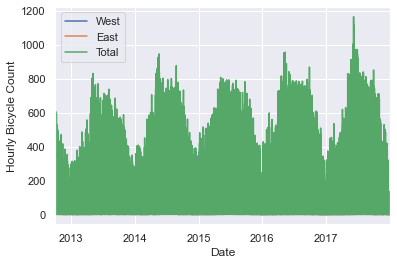

In [65]:
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle Count")
plt.show()

The ~25,000 hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid. Let’s resample by week

<Figure size 1296x1008 with 0 Axes>

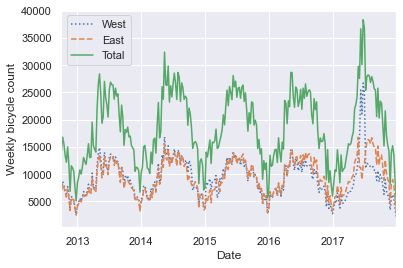

In [69]:
plt.figure(figsize=(18,14))
weekly = data.resample('W').sum()
weekly.plot(style=[":","--","-"])
plt.ylabel('Weekly bicycle count')
plt.show()

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the pd.rolling_mean() function. Here we’ll do a 30-day rolling mean of our data, making sure to center the window

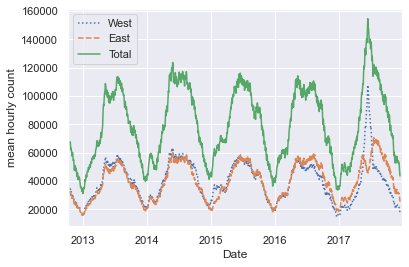

In [72]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window.

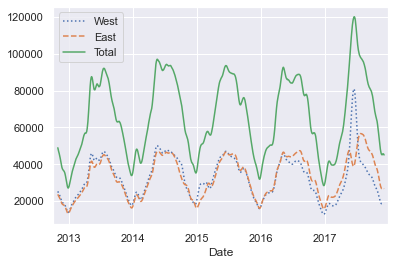

In [76]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])
plt.show()


# Digging into the data

While the smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day. We can do this using the GroupBy functionality

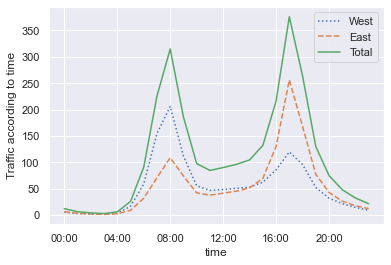

In [77]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()

# Sheikh Rasel Ahmed

Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast



##### LinkedIn - https://www.linkedin.com/in/shekhnirob1

##### GitHub - https://github.com/Rasel1435

##### Behance - https://www.behance.net/Shekhrasel2513